# Задача 5. Обучение без учителя
- [x] Найти данные с количеством признаков хотя бы 50, на которых можно решить задачу кластеризации.
- [x] Выполнить разведочный анализ (**EDA**). При необходимости выполнить полезные преобразования данных.
- [x] Самостоятельно реализуйте один из алгоритмов кластеризации, например **K-means**.
- [x] Обучите модели кластеризации, используя свою реализацию, а также хотя бы две реализации из **sklearn** (**KMeans**, **Affinity Propogation**, **DBSCAN** и тд).
- [x] При обучении использовать **подбор гиперпараметров**.
- [ ] Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества.
- [х] Также снизить размерность данных с помощью метода главных компонент **PCA** и понять качество дальнейшей кластеризации всеми использованными реализациями при различном количестве главных компонент.
- [x] Визуализировать данные снижением размерности до 2 или 3 с помощью **PCA** и **t-SNE**. В случае проблем с производительностью **t-SNE**, можно сначала до какой-то степени снизить размерность с помощью **PCA**, а затем запустить **t-SNE**.


# Датасет
Будем использовать [набор изображений статей Zalando](https://www.kaggle.com/datasets/zalando-research/fashionmnist?select=fashion-mnist_train.csv), состоящий из обучающего набора из 10 000 примеров. Каждый пример представляет собой изображение 28x28 пикселей, и указание на один из 10 классов.

## Описание атрибутов
- 28x28 атрибута вида `pixel#` --- указывает на оттенок серого от черного (0) до белого (255)
- `label` --- принимает значение от 0 до 9, что означает принадлежность изображения к одному из 10 видов одежды

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("fashion-mnist_test.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(10000, 785)

# EDA

In [5]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


## Проверка на пустые значения

In [6]:
df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

## Проверка дубликатов

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)
print(df.shape)

(9999, 785)


## Атрибут label

In [9]:
x = df.drop(columns=["label"])
y = df["label"]
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

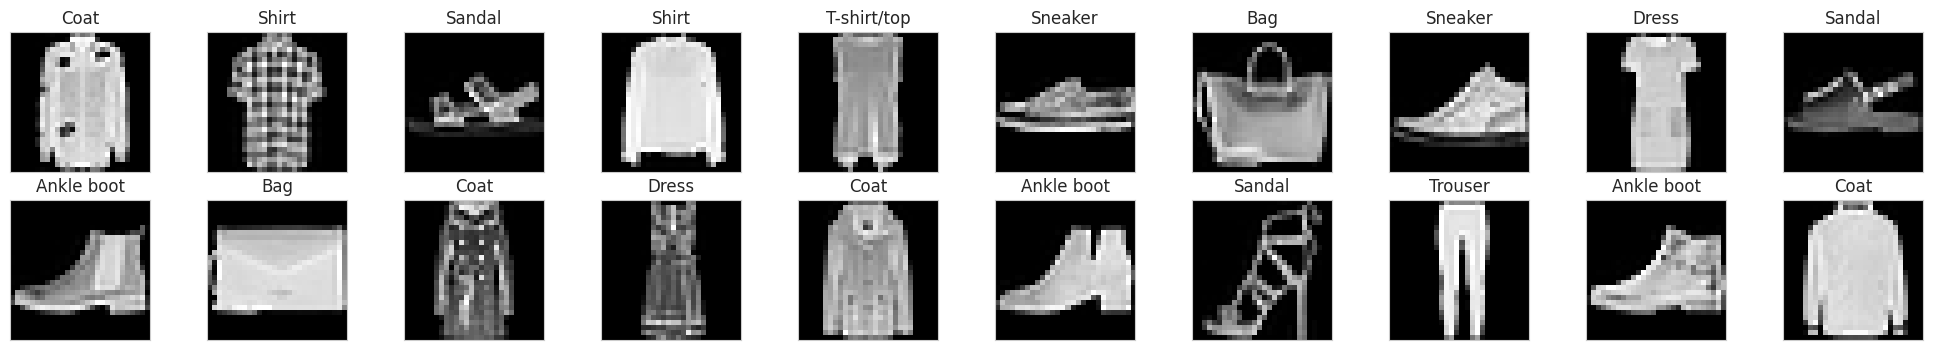

In [65]:
plt.figure(figsize=(25, 4))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.title(class_names)
    plt.imshow(x[i, :].reshape([28, 28]), cmap='gray')

## Проверка на лишние колонки (есть ли с одним уникальным значением)

In [11]:
df.nunique()

label        10
pixel1        3
pixel2        8
pixel3       11
pixel4       15
           ... 
pixel780    238
pixel781    205
pixel782    159
pixel783     77
pixel784     20
Length: 785, dtype: int64

## PCA и t-SNE
Попробуем визуализировать датасет, экстремально снизив его размерность до 2 признаков при помощи PCA и t-SNE

### PCA

In [12]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x)

/tmp/ipykernel_35569/3758870607.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


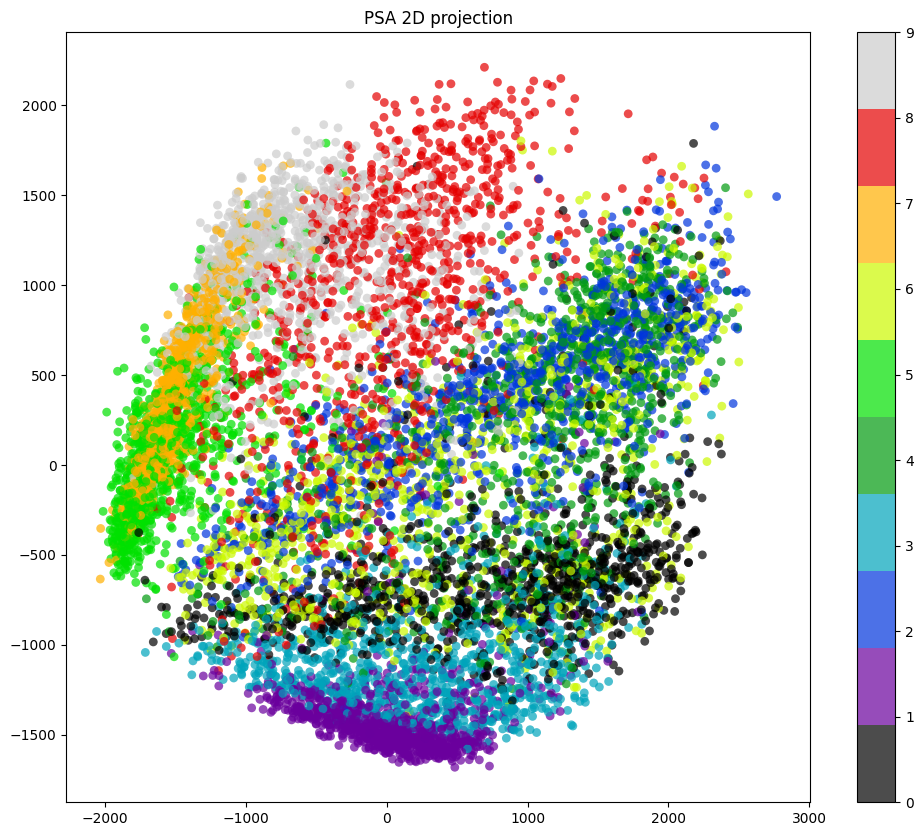

In [22]:
plt.figure(figsize=(12, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('PSA 2D projection');

Видим, что объекты одной группы находятся близко, но есть наложения.

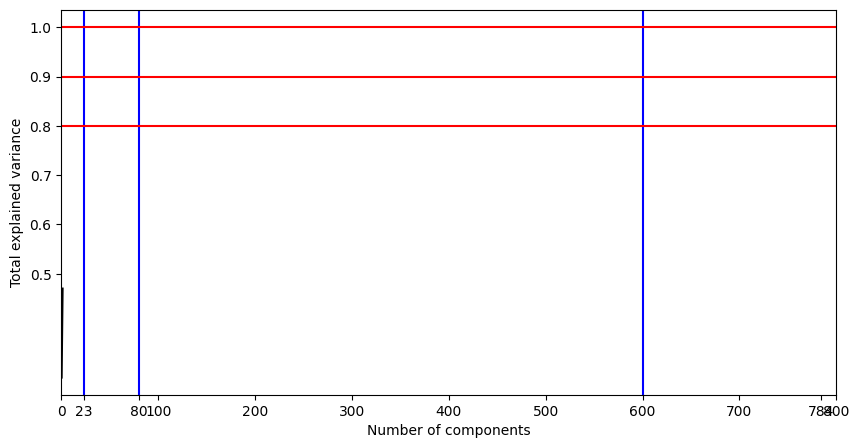

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 28 * 28)
plt.xticks(list(plt.xticks()[0]) + [23, 80, 28 * 28])
plt.yticks(np.arange(0.5, 1.01, 0.1))
plt.axvline(600, c='b')
plt.axvline(80, c='b')
plt.axvline(23, c='b')
plt.axhline(1, c='r')
plt.axhline(0.9, c='r')
plt.axhline(0.8, c='r')
plt.show();

Как видно, из 784 пикселей:

- 600 пикселей (77%) наиболее информативных описывают около 100% дисперсии
- Всего 80 пикселей (11%) — 90%
- Всего 23 пикселя (3%) — 80%

Это говорит о том, что размерность датасета можно существенно снизить, не сильно ухудшив при этом результаты кластеризации.

 ### t-SNE

In [24]:
from sklearn.manifold import TSNE

In [25]:
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(x)

/tmp/ipykernel_35569/2069574011.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap("nipy_spectral", 10),


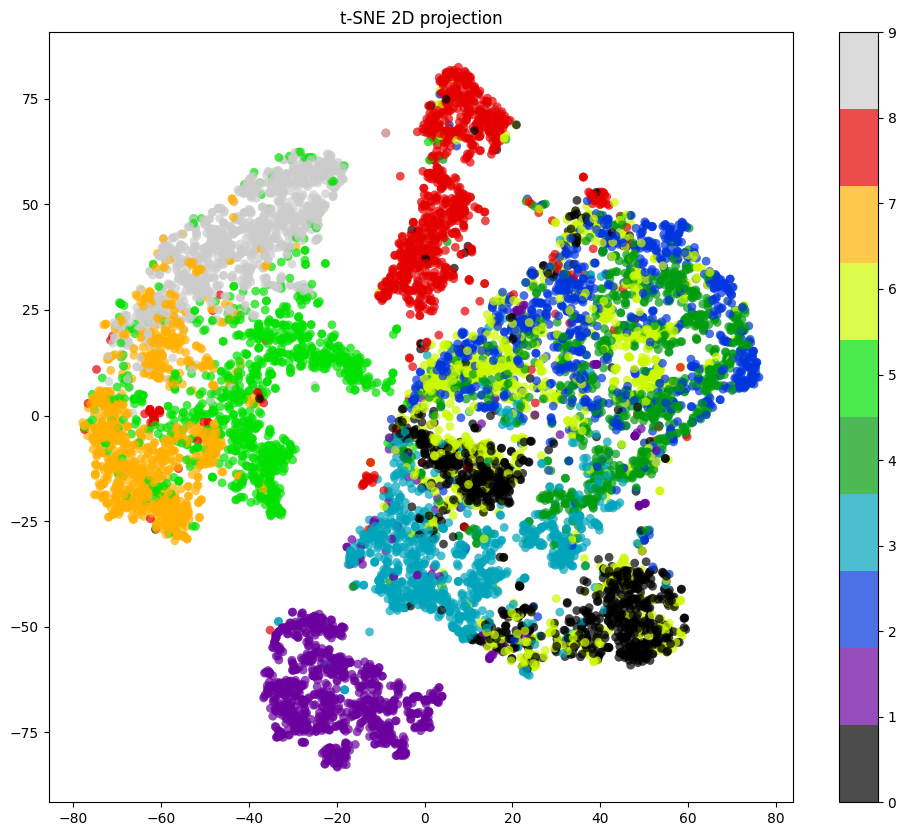

In [26]:
plt.figure(figsize=(12, 10))
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("nipy_spectral", 10),
)
plt.colorbar()
plt.title("t-SNE 2D projection");

По сравнению с предыдущей визуализацией видим образование четких групп (красная, фиолетовая), но остальные группы сильно сливаются.

# Реализация K-means

In [28]:
import numpy.typing as npt
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.utils import check_array, check_scalar, check_random_state
from sklearn.utils.validation import check_is_fitted


class MyKMeans(BaseEstimator, ClusterMixin):
    """ совместима с scikit-learn API """

    def __init__(self, n_clusters=10, *, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.tol = tol
        self.random_state = random_state

    def _get_labels(self, x: npt.NDArray) -> npt.NDArray:
        dists_to_center = np.linalg.norm(
            x[..., None] - self.cluster_centers_.T, axis=1
        )
        return np.argmin(dists_to_center, axis=1)

    def fit(self, x: npt.ArrayLike, y=None) -> "MyKMeans":
        self.n_clusters = check_scalar(self.n_clusters, "n_clusters", int, min_val=1)
        self.tol = check_scalar(self.tol, "tol", float, min_val=0)
        self.random_state_ = check_random_state(self.random_state)
        x = check_array(x)

        self.n_features_in_ = x.shape[1]

        self.cluster_centers_ = x[self.random_state_.choice(len(x), size=self.n_clusters, replace=False), :]

        max_shift = np.inf
        while max_shift > self.tol:
            self.labels_ = self._get_labels(x)
            new_centers = np.empty((self.n_clusters, self.n_features_in_))
            for label in np.unique(self.labels_):
                new_centers[label] = np.mean(x[self.labels_ == label], axis=0)

            max_shift = np.max(np.linalg.norm(self.cluster_centers_ - new_centers, axis=1))
            self.cluster_centers_ = new_centers

        return self

    def predict(self, x: npt.ArrayLike) -> npt.NDArray:
        check_is_fitted(self)
        x = check_array(x)
        return self._get_labels(x)


# check_estimator(MyKMeans())

# Обучение без учителя

## Метрики
В нашем датасете присутствуют однозначные ответы для всех данных -> советуют использовать Adjusted Rand Index, Adjusted Mutual Information и Fowlkes-Mallows Index

## Понижение атрибутов
Будем обучать с разным количеством атрибутов (сниженным при помощи PCA)
- исходный датасет с 784 атрибутоми
- датасет с 600 атрибутами (100% дисперсии)
- датасет с 80 атрибутами (90% дисперсии)
- датасет с 23 атрибутами (80% дисперсии)

In [29]:
xs = [x, *(PCA(n_components=c).fit_transform(x) for c in [600, 80, 23])]

In [45]:
import pathlib
import itertools
import time
from sklearn.base import clone
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score

RESULTS_PATH = pathlib.Path("cv_results.csv")

def train_and_store(estimator, param_grid = None):
    param_grid = param_grid if param_grid is not None else {}
    param_combs = [
        dict(params) for params in
        itertools.product(
            *([(name, v) for v in vs] for (name, vs) in param_grid.items())
        )
    ]

    results = []
    for x in xs:
        best_ari = None
        best_ami = None
        best_fmi = None

        for params in param_combs:
            cloned_estimator = clone(estimator).set_params(**params)

            start_t = time.perf_counter()
            pred = cloned_estimator.fit_predict(x)
            fit_predict_time_s = (time.perf_counter() - start_t)

            ari = adjusted_rand_score(y, pred)
            if best_ari is None or ari > best_ari[0]:
                best_ari = ari, fit_predict_time_s, params

            ami = adjusted_mutual_info_score(y, pred)
            if best_ami is None or ami > best_ami[0]:
                best_ami = ami, fit_predict_time_s, params

            fmi = fowlkes_mallows_score(y, pred)
            if best_fmi is None or fmi > best_fmi[0]:
                best_fmi = fmi, fit_predict_time_s, params

        print(
            f"Best params for {x.shape[1]}:",
            f"By ARI: {best_ari[2]}",
            f"By AMI: {best_ami[2]}",
            f"By FMI: {best_fmi[2]}",
            "",
            sep="\n",
        )

        results.append(
            {
                "Clusterer": estimator.__class__.__name__,
                "Number of components": x.shape[1],
                "Fit_predict time, s": np.mean([best_ari[1], best_ami[1], best_fmi[1]]),
                "ARI": best_ari[0],
                "AMI": best_ami[0],
                "FMI": best_fmi[0],
            }
        )

    pd.DataFrame(results).to_csv(RESULTS_PATH, mode="a", header=not RESULTS_PATH.exists())

## My K-means

In [31]:
%%time
train_and_store(MyKMeans(n_clusters=10, random_state=42))

Best params for 784:
By ARI: {}
By AMI: {}
By FMI: {}

Best params for 600:
By ARI: {}
By AMI: {}
By FMI: {}

Best params for 80:
By ARI: {}
By AMI: {}
By FMI: {}

Best params for 23:
By ARI: {}
By AMI: {}
By FMI: {}

CPU times: user 12 s, sys: 8.53 s, total: 20.5 s
Wall time: 20.5 s


## sklearn KMeans

In [32]:
%%time
from sklearn.cluster import KMeans

train_and_store(
    KMeans(n_clusters=10, n_init="auto", random_state=42),
    param_grid={
        "algorithm": ["lloyd", "elkan"],
    },
)

Best params for 784:
By ARI: {'algorithm': 'lloyd'}
By AMI: {'algorithm': 'lloyd'}
By FMI: {'algorithm': 'lloyd'}

Best params for 600:
By ARI: {'algorithm': 'lloyd'}
By AMI: {'algorithm': 'lloyd'}
By FMI: {'algorithm': 'lloyd'}

Best params for 80:
By ARI: {'algorithm': 'lloyd'}
By AMI: {'algorithm': 'lloyd'}
By FMI: {'algorithm': 'lloyd'}

Best params for 23:
By ARI: {'algorithm': 'lloyd'}
By AMI: {'algorithm': 'lloyd'}
By FMI: {'algorithm': 'lloyd'}

CPU times: user 35.8 s, sys: 7.41 s, total: 43.2 s
Wall time: 2.6 s


## sklearn DBSCAN

In [34]:
%%time
from sklearn.cluster import DBSCAN

train_and_store(
    DBSCAN(n_jobs=-1),
    param_grid={
        # Наиболее важный параметр, определяющий расстояние до соседей
        # по умолчанию = 0.5
        "eps": [0.5, 1, 2, 4,8,16,32,64,128,256,512,1024,2048],
        # Чем выше, тем меньше шума
        # по умолчанию = 5
        "min_samples": [5, 25, 125, 250],
    }
)

Best params for 784:
By ARI: {'eps': 1024, 'min_samples': 5}
By AMI: {'eps': 1024, 'min_samples': 25}
By FMI: {'eps': 0.5, 'min_samples': 5}

Best params for 600:
By ARI: {'eps': 1024, 'min_samples': 5}
By AMI: {'eps': 1024, 'min_samples': 125}
By FMI: {'eps': 0.5, 'min_samples': 5}

Best params for 80:
By ARI: {'eps': 1024, 'min_samples': 250}
By AMI: {'eps': 1024, 'min_samples': 250}
By FMI: {'eps': 0.5, 'min_samples': 5}

Best params for 23:
By ARI: {'eps': 512, 'min_samples': 5}
By AMI: {'eps': 512, 'min_samples': 25}
By FMI: {'eps': 512, 'min_samples': 25}

CPU times: user 1h 10min 49s, sys: 31min 32s, total: 1h 42min 22s
Wall time: 6min


# Результаты

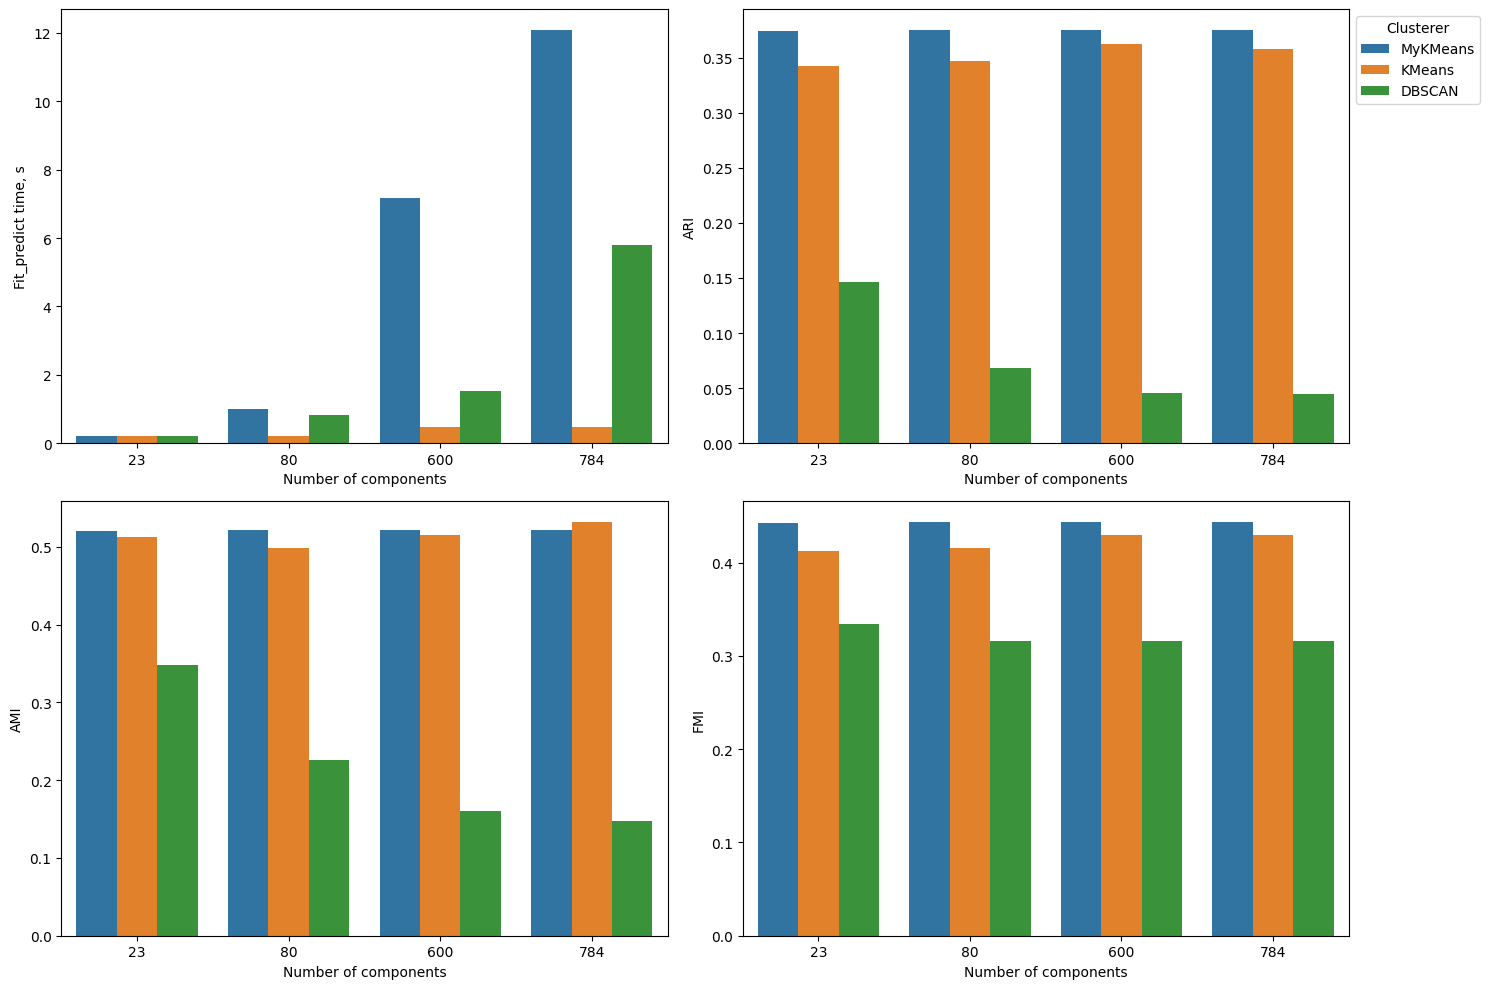

In [49]:
import seaborn as sns

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))

for metric, ax in zip(["Fit_predict time, s", "ARI", "AMI", "FMI"], axs.flatten()):
    sns.barplot(pd.read_csv(RESULTS_PATH), x="Number of components", y=metric, hue="Clusterer", ax=ax)
    if metric == "ARI":
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    else:
        ax.get_legend().remove()

fig.tight_layout()

## Выводы
1. При уменьшении количества атрибутов время уменьшается значительно
2. Показатели метрик при уменьшении количества атрибутов у кластеризаторов KMeans практически не изменялись
3. По всем метрикам KMeans превосходит DBSCAN
4. Также KMeans от sklearn превосходит по времени обучения DBSCAN
5. Но не смотря на все преимущества KMeans, данные реализации показывают довольно низкие результаты, т.к.
    a. -0.5 <= ARI <= 1
    b. -1 <= AMI <= 1
    c. 0 <= FMI <= 1